In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_blobs

### Dataset
<a href='https://ybdata-sci.tistory.com/19'>각 코드에 관한 설명</a>

/Users/kingyulim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Second Feature')

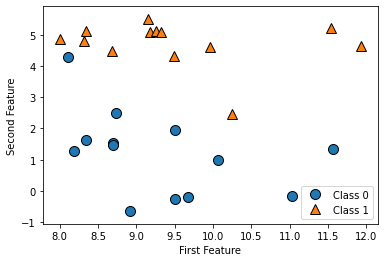

In [2]:
# make dataset
X, y = mglearn.datasets.make_forge()

# print scatterplot
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First Feature')
plt.ylabel('Second Feature')

less feature dataset: Low-dimension dataset <br>
many feature dataset: High-dimension dataset

Text(0, 0.5, 'Target')

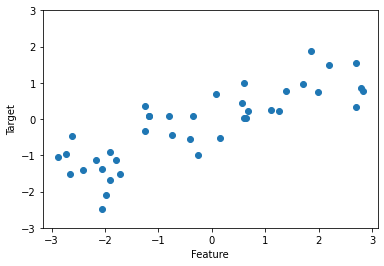

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [4]:
# use load_breast_cancer function from scikit-learn
# load Classification Dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n', cancer.keys())

cancer.keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print('유방암 데이터의 형태: ', cancer.data.shape)

유방암 데이터의 형태:  (569, 30)


In [6]:
print('클래스별 샘플 개수:\n',
     {n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [7]:
print('특성의 이름: \n', cancer.feature_names)

특성의 이름: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# load Regression Dataset
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터의 형태: ', boston.data.shape)

데이터의 형태:  (506, 13)


/Users/kingyulim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

### k-최근접 이웃
가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측하는 것

/Users/kingyulim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


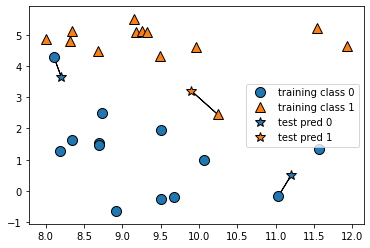

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/kingyulim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


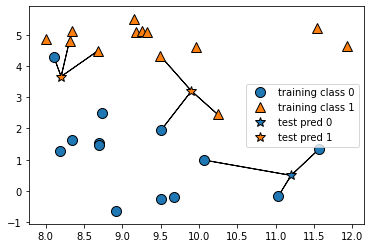

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
# 클래스가 다수인 데이터셋에도 같은 방법을 적용할 수 있음
# 각 클래스에 속한 이웃이 몇 개인지 헤아려 가장 많은 클래스를 예측값으로 사용

In [11]:
# dive dataset train set, test set
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Users/kingyulim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [12]:
# make model object
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
print('테스트 데이터 예측:', clf.predict(X_test))

테스트 데이터 예측: [1 0 1 0 1 0 0]


In [15]:
print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


### KNeighborsClassifier 분석
2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 XY 평면에 그릴 수 있음 <br>
그리고 각 데이터 포인트가 속한 클래스에 따라 평면의 색을 칠함<br>
클래스 0과 클래스 1로 지정한 영역으로 나뉘는 결정 경계(Decision boundary) 추출<br>

/Users/kingyulim/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


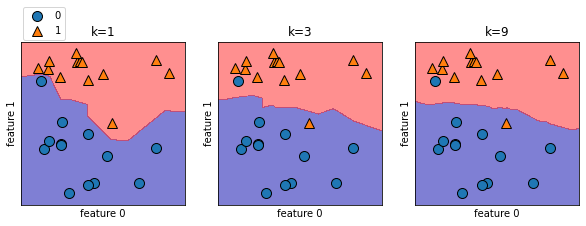

In [16]:
from mglearn.datasets import make_forge
x, y = make_forge()
_, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, ax in zip([1, 3, 9], axes.ravel()):
    knn = KNeighborsClassifier(i)
    knn.fit(x, y)
    mglearn.plots.plot_2d_separator(knn, x, fill=True, eps=0.5, alpha=0.5, ax=ax)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y=y, ax=ax)
    ax.set_title('k={}'.format(i))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

axes[0].legend(loc=(0.01, 1.01))
plt.show()

이웃의 수를 늘릴수록 결정 경계는 부드러워짐 <br>
부드러운 경계는 더 단순한 모델을 의미함<br>
이웃을 적게 사용하면 모델의 복잡도가 높아자고 많이 사용하면 복잡도가 낮아짐

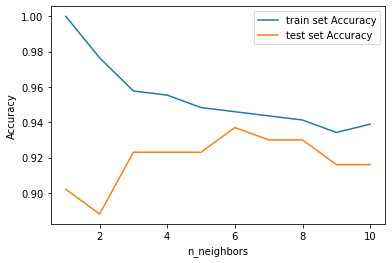

In [17]:
# 모델의 복잡도와 일반화 사이의 관계를 입증
# 유방암 데이터셋
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='train set Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test set Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

### k-최근접 이웃 회귀
k-최근접 이웃 알고리즘은 회귀 분석에도 쓰임 <br>
최근접 이웃을 한 개만 이용할 때 예측은 그냥 가장 가까운 이웃의 타깃 값

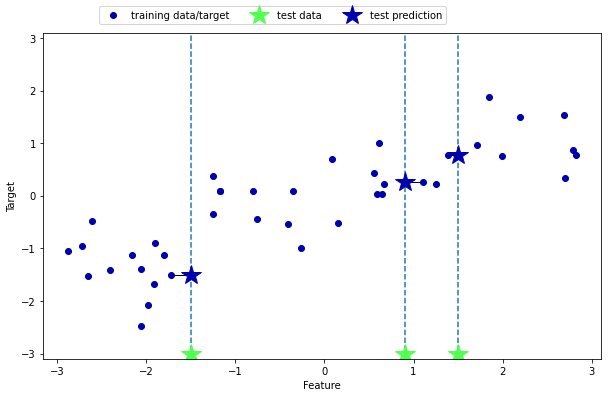

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

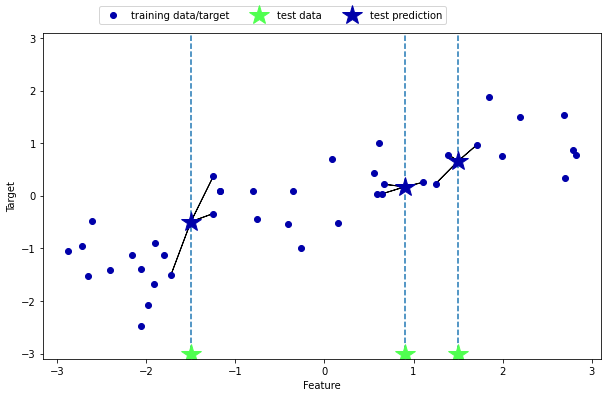

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

In [21]:
# split wave dataset by training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# make object by n_neighbors=3
reg = KNeighborsRegressor(n_neighbors=3)
# Train model used by train set and target
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print('테스트 세트 예측:\n', reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


### KNeighborsRegressor 분석
1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측해볼 수 있음 <br>
x측을 따라 많은 포인트를 생성해 테스트 데이터셋을 만듬

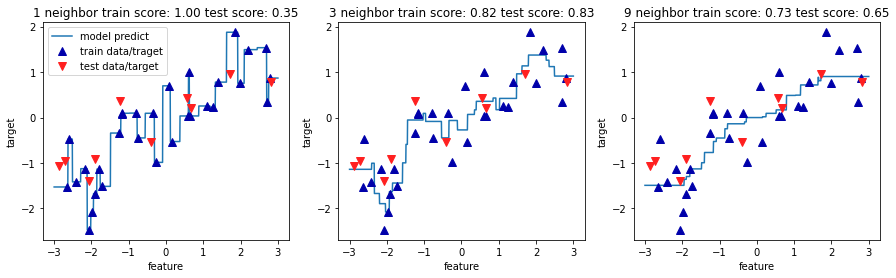

In [24]:
f, axes = plt.subplots(1, 3, figsize=(15, 4))
# make 1,000 data point between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # predict used by neighbor 1, 3, 9
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        '{} neighbor train score: {:.2f} test score: {:.2f}'.format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
axes[0].legend(['model predict', 'train data/traget',
             'test data/target'], loc='best')
plt.show()

### 장단점과 매개변수
KNeighbors 분류기에 중요한 매개변수는 두 개 <br>
데이터 포인트 사이의 거리를 재는 방법과 이웃의 수 <br>
실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동함 (기본적으로 유클리디안 거리 방식 사용)<br>
k-NN의 장점은 ***이해하기 매우 쉬운 모델*** <br>
특성의 수나 샘플의 수가 클 경우 예측이 느려짐 <br>
또한 데이터의 전처리가 중요한 알고리즘 <br>

## 선형 모델
입력 특성에 대한 선형 함수를 만들어 예측을 수행 <br>

### 회귀의 선형 모델
w: 기울기 <br>
b: 절편<br>
예측값은 입력 특성에 w의 각 가중치를 곱해서 더한 가중치의 합

w[0]: 0.393906  b: -0.031804


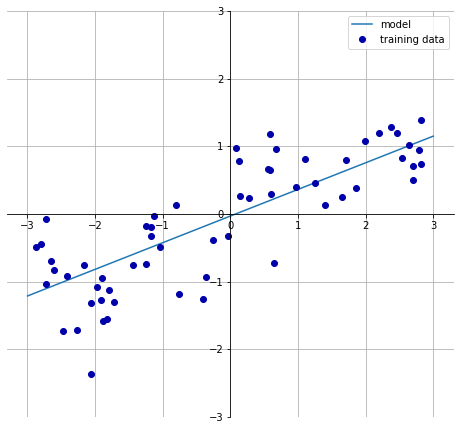

In [25]:
mglearn.plots.plot_linear_regression_wave()

기울기는 대략 0.4 <br>
회귀를 위한 선형 모델은 특성이 하나일 땐 직선 두 개일 땐 평면 그 이상은 초평면(hyperplane) <br>
선형 회귀는 데이터의 상세 정보를 모두 잃은 것처럼 보임 <br>
특성이 많은 데이터셋이라면 훨씬 훌륭한 성능이 가능 <br>

### 선형 회귀(최소제곱법)
선형 회귀(linear regression) 또는 최소제곱법(OLS, ordinary least squres)